In [1]:
import numpy as np
from PIL import Image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [2]:
CATEGORIES = ['kinoko', 'takenoko']
IMAGE_SIZE = 28
filter = 20

In [3]:
model = load_model('/workspace/models/ml.model.h5')

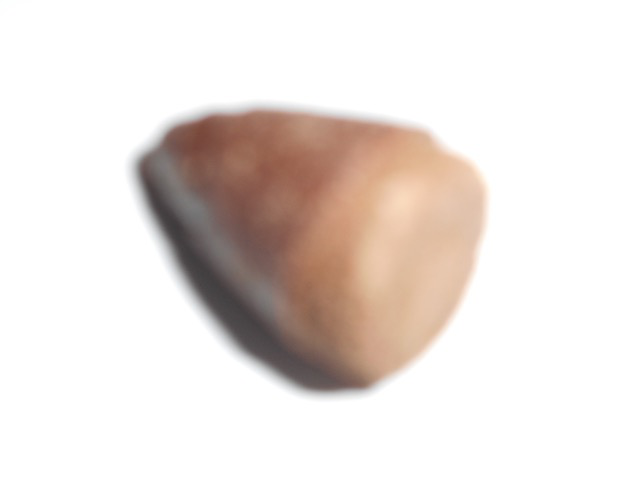

In [4]:
image = '/workspace/image/predict/takenoko/DSCN0046.jpg'
Image.open(image)

In [5]:
x = img_to_array(load_img(image, grayscale=True, target_size=(IMAGE_SIZE, IMAGE_SIZE)))
x = x.reshape(1, IMAGE_SIZE * IMAGE_SIZE)
x = np.clip(255 - x - filter, 0, 255)
x /= 255

In [6]:
# 推論
ans = model.predict(x)

In [7]:
list = []
for stat,category in zip(ans[0], CATEGORIES):
   list.append((stat, category))

for stat, category in sorted(list, reverse=True):
    print('%s: %s' % (category, round(stat * 100, 1)))

takenoko: 99.9
kinoko: 0.1
